<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/cont/23_under_over_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Niedouczenie i Przeuczenie

### Import bibliotek

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
import pandas as pd
import numpy as np

np.random.seed(42)
sns.set(font_scale=1.3)

### Wygenerowanie danych

In [2]:
raw_data = make_moons(n_samples=700, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

data[:5]

array([[-0.15995017,  1.03638621],
       [ 1.13114102, -0.58763612],
       [ 0.16966619,  0.09420938],
       [ 0.51772753,  0.81518706],
       [-0.68002085,  0.15563468]])

In [3]:
target[:5]

array([0, 1, 1, 0, 0])

In [4]:
df = pd.DataFrame(data=np.c_[data, target], columns=['x1', 'x2', 'target'])
df.head()

,x1,x2,target
0,-0.159950,1.036386,0.0
1,1.131141,-0.587636,1.0
2,0.169666,0.094209,1.0
3,0.517728,0.815187,0.0
4,-0.680021,0.155635,0.0


### Wizualizacja danych

In [5]:
px.scatter(df, x='x1', y='x2', color='target', width=800, height=500)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Klasyfikacja - dane do modelu')

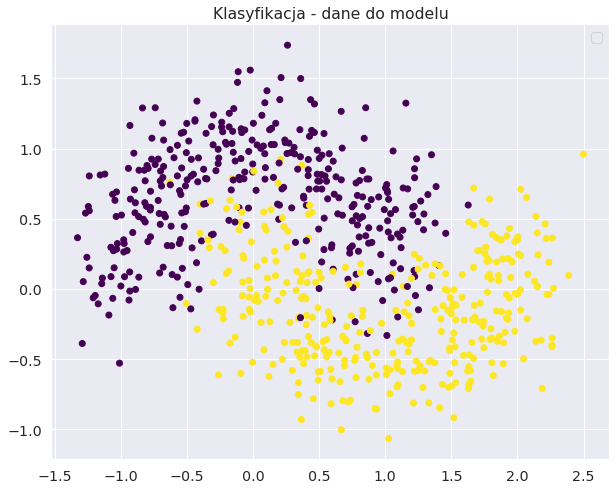

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis')
plt.legend()
plt.title('Klasyfikacja - dane do modelu')

### Podział na zbiór treningowy i testowy

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (525, 2)
X_test shape: (175, 2)
y_train shape: (525,)
y_test shape: (175,)


### Wizualizacja zbioru treningowego i testowego

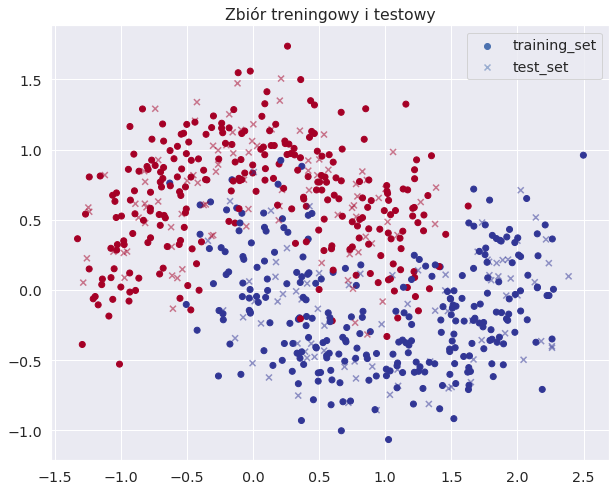

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', label = 'training_set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.title('Zbiór treningowy i testowy')
plt.legend()

### Niedouczenie - Regresja Logistyczna

Text(0.5, 1.0, 'Zbiór treningowy: dokładność 0.8590')

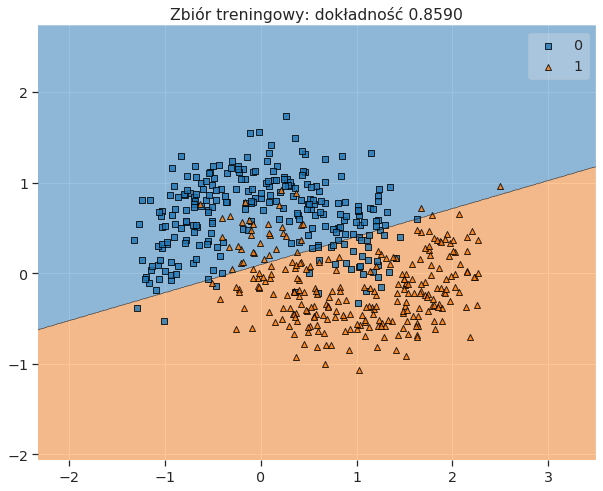

In [9]:
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, log_reg)
plt.title(f'Zbiór treningowy: dokładność {log_reg.score(X_train, y_train):.4f}')

### Zbiór testowy

Text(0.5, 1.0, 'Zbiór testowy: dokładność 0.8914')

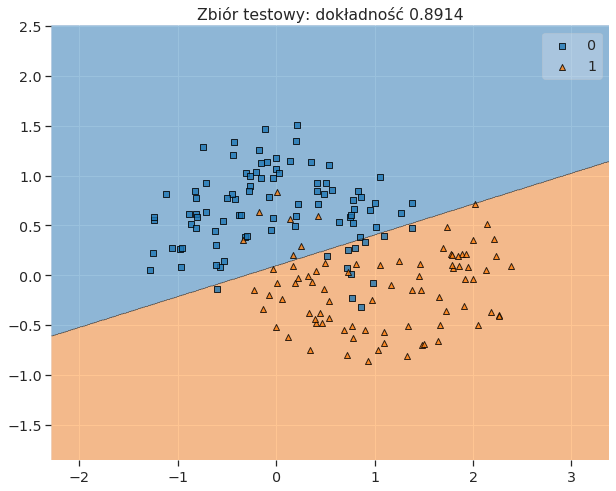

In [10]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, log_reg)
plt.title(f'Zbiór testowy: dokładność {log_reg.score(X_test, y_test):.4f}')

### Niedouczenie - Drzewa Decyzyjne

Text(0.5, 1.0, 'Zbiór treningowy: dokładność 0.8267')

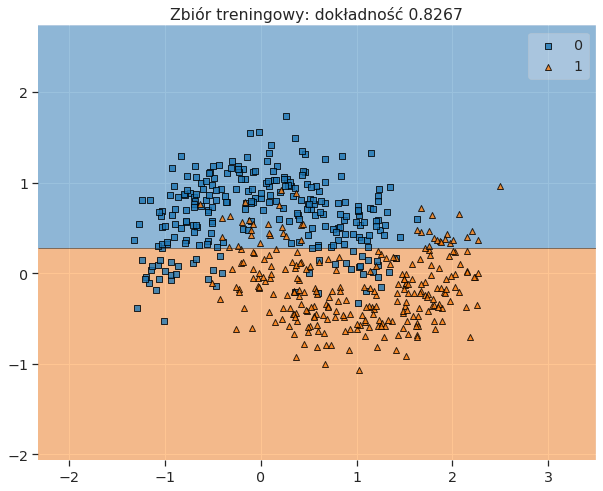

In [11]:
tree_clf = DecisionTreeClassifier(max_depth=1)
tree_clf.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, tree_clf)
plt.title(f'Zbiór treningowy: dokładność {tree_clf.score(X_train, y_train):.4f}')

Text(0.5, 1.0, 'Zbiór testowy: dokładność 0.8343')

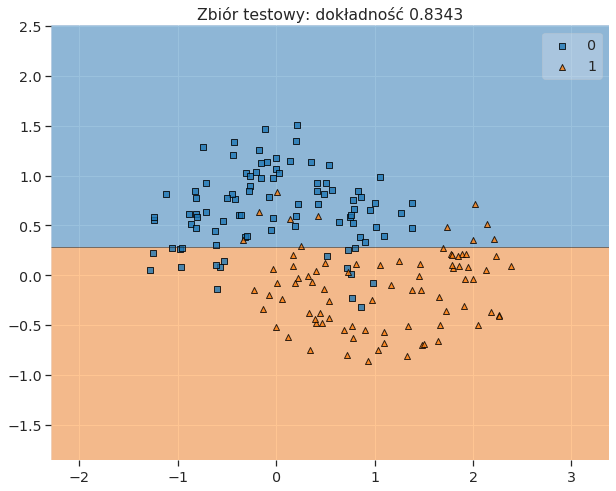

In [12]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, tree_clf)
plt.title(f'Zbiór testowy: dokładność {tree_clf.score(X_test, y_test):.4f}')

### Przykład przeuczenia

Text(0.5, 1.0, 'Zbiór treningowy: dokładność 1.0000')

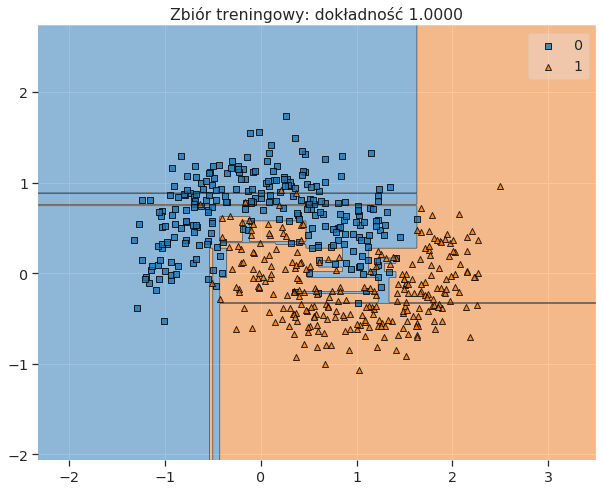

In [13]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, tree_clf)
plt.title(f'Zbiór treningowy: dokładność {tree_clf.score(X_train, y_train):.4f}')

Text(0.5, 1.0, 'Zbiór testowy: dokładność 0.8686')

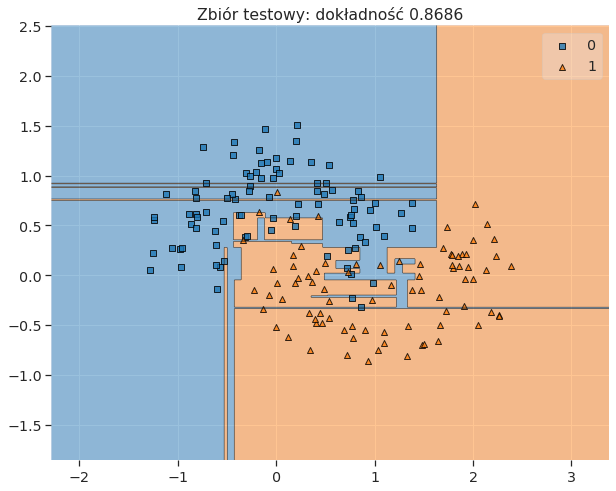

In [14]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, tree_clf)
plt.title(f'Zbiór testowy: dokładność {tree_clf.score(X_test, y_test):.4f}')

### Wybór optymalnych hiperparametrów - Grid Search

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()

params = {'max_depth': np.arange(1, 10),
         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}

grid_search = GridSearchCV(tree, param_grid=params, n_jobs=-1, scoring='accuracy', cv=5)

In [21]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
      

In [22]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 3}

Text(0.5, 1.0, 'Zbiór treningowy: dokładność 0.9371')

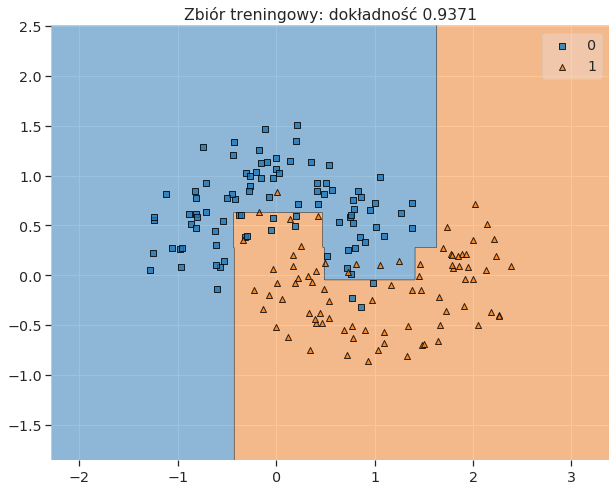

In [23]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(X_train, y_train):.4f}')

Text(0.5, 1.0, 'Zbiór testowy: dokładność 0.8971')

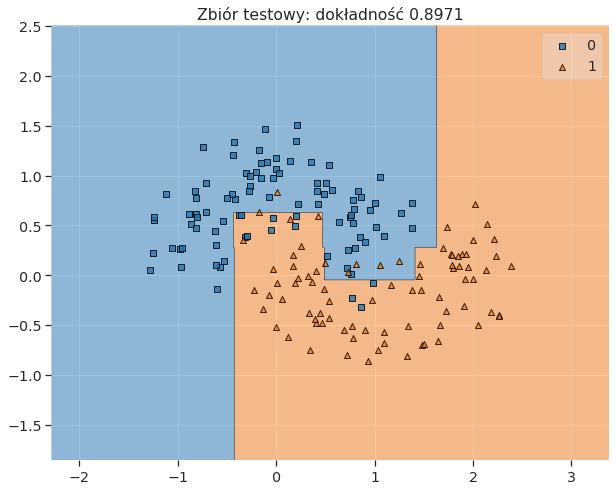

In [24]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(X_test, y_test):.4f}')